In [196]:
!nvidia-smi

Sun Nov 19 06:10:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    31W /  70W |   4923MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [184]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0

try:
  %tensorflow_version 2.x  # Colab only
except Exception:
  pass

import tensorflow as tf
from typing_extensions import Concatenate
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.14.0


In [185]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [186]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [187]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [188]:
vgg = tf.keras.applications.VGG16(
    input_shape=[100, 100, 3], include_top=False, weights='imagenet')

In [189]:
x = Flatten()(vgg.output)
x = Dense(4, activation='sigmoid')(x)
model = Model(vgg.input, x)

In [190]:
def image_generator(batch_size=64):
  # generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(50):
      X = np.zeros((batch_size, 100, 100, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        # make the boxes and store their location in target
        row0 = np.random.randint(90)
        col0 = np.random.randint(90)
        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)
        X[i,row0:row1,col0:col1,:] = 1
        Y[i,0] = row0/100.
        Y[i,1] = col0/100.
        Y[i,2] = (row1 - row0)/100.
        Y[i,3] = (col1 - col0)/100.

      yield X, Y

In [191]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

In [192]:
model.fit(
    image_generator(),
    steps_per_epoch=50,
    epochs=10,
)

Epoch 1/10
50/50 [==============================] - 12s 177ms/step - loss: 1.0814
Epoch 2/10
50/50 [==============================] - 9s 178ms/step - loss: 0.5291
Epoch 3/10
50/50 [==============================] - 9s 182ms/step - loss: 0.5092
Epoch 4/10
50/50 [==============================] - 9s 183ms/step - loss: 0.5110
Epoch 5/10
50/50 [==============================] - 9s 182ms/step - loss: 0.5069
Epoch 6/10
50/50 [==============================] - 9s 182ms/step - loss: 0.5041
Epoch 7/10
50/50 [==============================] - 9s 180ms/step - loss: 0.5035
Epoch 8/10
50/50 [==============================] - 9s 179ms/step - loss: 0.5059
Epoch 9/10
50/50 [==============================] - 9s 179ms/step - loss: 0.5066
Epoch 10/10
50/50 [==============================] - 9s 179ms/step - loss: 0.5059


In [193]:
from matplotlib.patches import Rectangle

def make_prediction(image):
    # Predict
    X = np.expand_dims(image, 0)
    p = model.predict(X)[0]

    # Draw the box
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    rect = Rectangle(
        (p[1] * 100, p[0] * 100),
        p[3] * 100, p[2] * 100, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

In [194]:
# make_prediction()

1/1 [==============================] - 0s 127ms/step


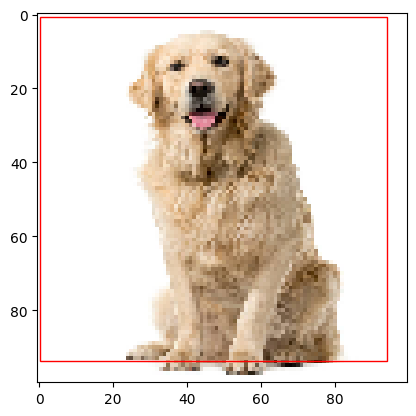

In [195]:
import cv2

dog_image = cv2.imread('/content/dog.jpg')

dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB)

dog_image = cv2.resize(dog_image, (100, 100))

dog_image = dog_image / 255.0

make_prediction(dog_image)